# Support Vector Classifier Course Exam

## Introducing the database

#### The database for this example is taken from https://archive-beta.ics.uci.edu/ml/datasets/predict+students+dropout+and+academic+success

#### We usually modify these databases slightly such that they fit the purpose of the course. Therefore, we suggest you use the database provided in the platform to obtain the same results.

# Library imports

In [4]:
import pandas as pd #for reading the data
from sklearn.preprocessing import MinMaxScaler #for data standardization
from sklearn.model_selection import train_test_split #to split the data into train and test parts
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder #to encode the data to numerical
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report, cohen_kappa_score, matthews_corrcoef, log_loss, \
ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV #for cross validation
from sklearn.metrics import classification_report #for cross validation
import matplotlib.pyplot as plt

In [78]:
import numpy as np

## Loading the database

#### Read the csv file and study the database

In [10]:
df = pd.read_csv("student_dropout.csv", dtype = str)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.66666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13,0,13.9,-0.3,0.79,Graduate


#### Check target class distribution and check for missing values

In [13]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [15]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

## Preprocessing

#### Define the target and the inputs

In [17]:
inputs= df.drop(['Target'],axis=1)
target=df['Target']

#### Create a training and a testing dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target,
                                                    stratify=target,
                                                    test_size=0.5, 
                                                    random_state = 365,
)

#### Define an encoder for the target 

In [23]:
enc_t = LabelEncoder()

#### Apply the fit_transform() method on the training data and the transform() method on the test data.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Marital status                                  4424 non-null   object
 1   Application mode                                4424 non-null   object
 2   Application order                               4424 non-null   object
 3   Course                                          4424 non-null   object
 4   Daytime/evening attendance	                     4424 non-null   object
 5   Previous qualification                          4424 non-null   object
 6   Previous qualification (grade)                  4424 non-null   object
 7   Nacionality                                     4424 non-null   object
 8   Mother's qualification                          4424 non-null   object
 9   Father's qualification                          4424

In [42]:
y_tarin=enc_t.fit_transform(y_train)
y_test=enc_t.transform(y_test)

ValueError: y contains previously unseen labels: 2

In [44]:
y_tarin

array([0, 2, 2, ..., 0, 2, 0])

### rescale to the range [-1, 1]

In [46]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
x_train_rescaled = scaling.transform(X_train)
x_test_res=scaling.transform(X_test)

### Choose a C value of 1

In [48]:
C = 1.0

## Classification

In [50]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C)
svc.fit(x_train_rescaled, y_train) #train the svm

SVC(kernel='linear')

In [54]:
y_pred_test = svc.predict(x_test_res) #predict on test data

#### Evaluate the model on the test data

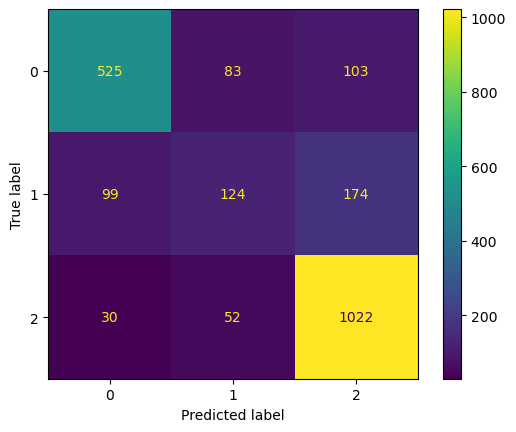

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test ,y_pred_test  )

In [ ]:

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(#test set values, #predicted values),
    display_labels=[#enter the class lables "" , "", ""],
   
)

cmp.plot(ax=ax);

In [ ]:
#classification report


## Classification with different kernels

### Create and test the following svms with the respective kernels and C values


In [ ]:
#linear, C = 1
#rbf, gamma = 1e-3 C = 1
#sigmoid, C = 1
#poly, C = 10

In [ ]:
#classification report for each classifier

In [58]:
tuned_parameters = [
    {"kernel": ["linear"], "C": [1]},
    {"kernel": ["poly"], "C":[10]},
    {"kernel": ["rbf"], "gamma": [1e-3], "C": [1]},
    {"kernel": ["sigmoid"], "C":[1]}
]

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       711
           1       0.48      0.31      0.38       397
           2       0.79      0.93      0.85      1104

    accuracy                           0.76      2212
   macro avg       0.69      0.66      0.67      2212
weighted avg       0.74      0.76      0.74      2212



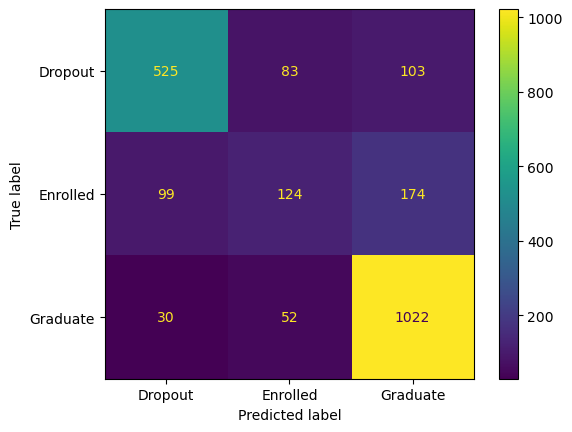

In [90]:
svc = svm.SVC(kernel='linear', C=1)
svc.fit(x_train_rescaled, y_train) #train the svm
y_pred_test = svc.predict(x_test_res) #predict on test data
ConfusionMatrixDisplay.from_predictions(y_test ,y_pred_test ,display_labels=class_names   )
print(classification_report(y_test ,y_pred_test))

In [86]:
class_names = enc_t.classes_
class_names

array(['Dropout', 'Enrolled', 'Graduate'], dtype=object)

              precision    recall  f1-score   support

           0       0.82      0.63      0.71       711
           1       0.00      0.00      0.00       397
           2       0.64      0.96      0.77      1104

    accuracy                           0.68      2212
   macro avg       0.48      0.53      0.49      2212
weighted avg       0.58      0.68      0.61      2212



C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


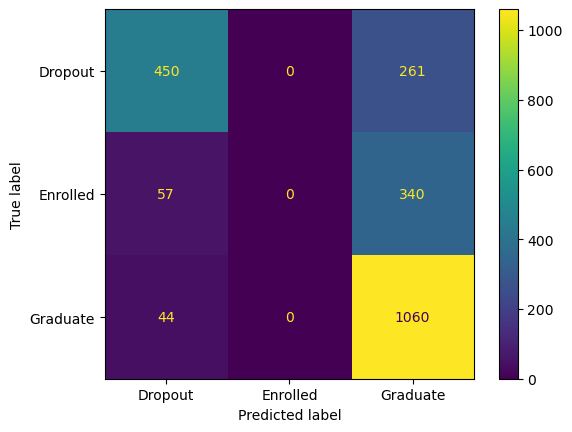

In [88]:
svc = svm.SVC(kernel='rbf',gamma=0.001, C=1)
svc.fit(x_train_rescaled, y_train) #train the svm
y_pred_test = svc.predict(x_test_res) #predict on test data
ConfusionMatrixDisplay.from_predictions(y_test ,y_pred_test ,display_labels=class_names   )
print(classification_report(y_test ,y_pred_test))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       711
           1       0.33      0.14      0.20       397
           2       0.72      0.83      0.77      1104

    accuracy                           0.68      2212
   macro avg       0.58      0.57      0.56      2212
weighted avg       0.64      0.68      0.65      2212



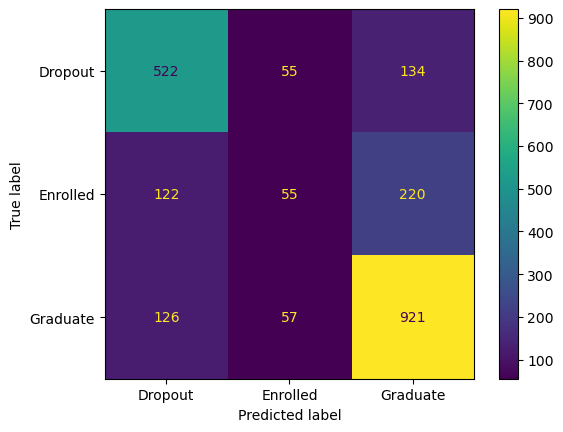

In [92]:
svc = svm.SVC(kernel='sigmoid', C=1)
svc.fit(x_train_rescaled, y_train) #train the svm
y_pred_test = svc.predict(x_test_res) #predict on test data
ConfusionMatrixDisplay.from_predictions(y_test ,y_pred_test ,display_labels=class_names   )
print(classification_report(y_test ,y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       711
           1       0.45      0.34      0.38       397
           2       0.81      0.89      0.84      1104

    accuracy                           0.75      2212
   macro avg       0.67      0.66      0.66      2212
weighted avg       0.73      0.75      0.73      2212



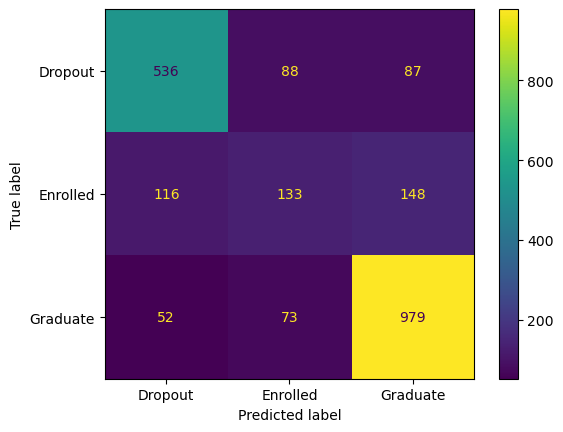

In [94]:
svc = svm.SVC(kernel='poly', C=10)
svc.fit(x_train_rescaled, y_train) #train the svm
y_pred_test = svc.predict(x_test_res) #predict on test data
ConfusionMatrixDisplay.from_predictions(y_test ,y_pred_test ,display_labels=class_names   )
print(classification_report(y_test ,y_pred_test))

###  Test overall performance for the dropout class

In [5]:
# create a new train and test set, with a test set of 30%


In [ ]:
#follow the necessary preprocessing steps


In [ ]:
#train classifier


In [39]:
#predict on new test set


In [40]:
#linear, C = 1
#rbf, gamma = 1e-3, C = 10
#poly, C = 1
#poly, C = 10

In [41]:
#classification report for each classifier

In [6]:
# kernel = poly, C = 10, test_size = 0.3
